I work on a dataset that can be found on the following link:

https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data?resource=download

This dataset contains the different attributes of used/refurbished phones and tablets.

# Data exploration and data wrangling

I start importing the first libraries that will help me to work on the data

In [1]:
import pandas as pd
import numpy as np

I upload the dataset as a dataframe

In [2]:
used_device_df = pd.read_csv('used_device_data.csv')

## Explore the dataset

I print a summary of the database

In [3]:
used_device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

There are 15 variables:
- **device_brand** is the name of manufacturing brand;
- **os** is the operating system on which the device runs;
- **screen_size** is the size of the screen in cm;
- **4g** is a string declaring whether 4G is available or not;
- **5g** is a string declaring whether 5G is available or not;
- **rear_camera_mp** is the resolution of the rear camera in megapixels;
- **front_camera_mp** is the resolution of the front camera in megapixels;
- **internal_memory** is the amount of internal memory (ROM) in GB;
- **ram** is the amount of RAM in GB;
- **battery** is the energy capacity of the device battery in mAh;
- **weight** is the weight of the device in grams;
- **release_year** is the year when the device model was released;
- **days_used** is the number of days the used/refurbished device has been used;
- **normalized_new_price** is the normalized price of a new device of the same model;
- **normalized_used_price** is the normalized price of the used/refurbished device.

The values are of three types: object, float64 and int64.

Correctly the values of the columns "release_year" and "days_used" are integers.

Six variables have some null values that I have to work on soon.

There are 3454 samples, which means that this is the number of the smartphones registered.


In [4]:
used_device_df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
rear_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
front_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
internal_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


I get some descriptive statistics.

The first interesting thing that can be inferred from these values is the fact that the devices have been released between 2013 and 2020 and they are used for a maximum of three years.

In [5]:
used_device_df.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


An interesting thing fact is that the prices appear surprisely strange, because they have been normalized. There are usually two reasons:
1. The general range of prices changes over time;
2. The price of a smartphone also depends on where you buy it (both online and phisically).

Because of this, it will be easier to compare different devices.

In [6]:
used_device_df.tail()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


After I got the first 5 rows and the last 5 rows, it seems like the database is only dealing with android devices, I check that we are not:

In [7]:
used_device_df['os'].unique()

array(['Android', 'Others', 'iOS', 'Windows'], dtype=object)

The dataset contains android, iOS, Windows and other operative systems, so I keep this column.

## Clean up the dataset

I start renaming the columns with the prices, not to confuse them for the further analysis:

In [8]:
used_device_df = used_device_df.rename(columns={'normalized_used_price': 'used_price', 'normalized_new_price': 'new_price'})

In the previous part, I found out that in the columns 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery' and 'weight' there are some null values, this is how I decide operate:
1. for 'rear_camera_mp' and 'front_camera_mp', I decide to replace the empty cells with zeros, because I suppose that the reason why these values are missing is because the camera is not present or that maybe this device has a broken camera;
2. for 'internal_memory', 'ram', 'battery' and 'weight', I decide to replace the empty cells with the mean of that column, because all these features are always present in smartphones and tablets.

In [9]:
#filling NaNs with zeros
used_device_df['rear_camera_mp'].fillna(value = 0, inplace = True)
used_device_df['front_camera_mp'].fillna(value = 0, inplace = True)

#filling Nans with the means
used_device_df['internal_memory'].fillna(used_device_df['internal_memory'].mean(), inplace = True)
used_device_df['ram'].fillna(used_device_df['ram'].mean(), inplace = True)
used_device_df['battery'].fillna(used_device_df['battery'].mean(), inplace = True)
used_device_df['weight'].fillna(used_device_df['weight'].mean(), inplace = True)

In [10]:
used_device_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   device_brand     3454 non-null   object 
 1   os               3454 non-null   object 
 2   screen_size      3454 non-null   float64
 3   4g               3454 non-null   object 
 4   5g               3454 non-null   object 
 5   rear_camera_mp   3454 non-null   float64
 6   front_camera_mp  3454 non-null   float64
 7   internal_memory  3454 non-null   float64
 8   ram              3454 non-null   float64
 9   battery          3454 non-null   float64
 10  weight           3454 non-null   float64
 11  release_year     3454 non-null   int64  
 12  days_used        3454 non-null   int64  
 13  used_price       3454 non-null   float64
 14  new_price        3454 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 404.9+ KB


Now I have no null values in the dataset.

I also want to check if there are some rows duplicated

In [11]:
used_device_df[used_device_df.duplicated()] 

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,used_price,new_price


There are no duplicates.

I decide to give a look at the internal memory of the smartphones to check if they are coherent with the reality.

In [12]:
used_device_df['internal_memory'].value_counts()

16.000000      1283
32.000000      1083
64.000000       509
128.000000      372
256.000000       86
512.000000       44
0.060000         18
0.100000         17
8.000000         12
4.000000         10
1024.000000       8
0.500000          4
54.573099         4
0.200000          2
24.000000         1
0.010000          1
Name: internal_memory, dtype: int64

Usually the amount of the internal memory of a device in GB is a power of 2, but as it can be seen, there are some particular values (and also very small ones). I decide to create a mask to see the other features of these devices to compare all the data together:

In [49]:
vector = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024] #first ten powers of 2
applied_mask_df = used_device_df

for i in range(0, len(vector)):
    particular_memory_mask = applied_mask_df['internal_memory'] != vector[i]
    applied_mask_df = applied_mask_df[particular_memory_mask]


In [14]:
applied_mask_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 103 to 3387
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   device_brand     47 non-null     object 
 1   os               47 non-null     object 
 2   screen_size      47 non-null     float64
 3   4g               47 non-null     object 
 4   5g               47 non-null     object 
 5   rear_camera_mp   47 non-null     float64
 6   front_camera_mp  47 non-null     float64
 7   internal_memory  47 non-null     float64
 8   ram              47 non-null     float64
 9   battery          47 non-null     float64
 10  weight           47 non-null     float64
 11  release_year     47 non-null     int64  
 12  days_used        47 non-null     int64  
 13  used_price       47 non-null     float64
 14  new_price        47 non-null     float64
dtypes: float64(9), int64(2), object(4)
memory usage: 5.9+ KB


In [15]:
applied_mask_df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,used_price,new_price
103,Micromax,Android,10.16,no,no,2.00,0.3,0.500000,0.250000,1500.000000,146.5,2014,1016,3.043570,3.926715
104,Micromax,Android,7.75,no,no,0.30,0.3,0.500000,0.250000,1500.000000,89.0,2014,956,2.386926,3.664843
105,Micromax,Android,10.03,no,no,2.00,0.3,0.200000,0.250000,2000.000000,85.0,2013,680,2.856470,4.244631
113,Nokia,Others,5.18,no,no,0.30,0.0,0.100000,0.030000,1020.000000,90.5,2020,272,2.910174,3.399863
114,Nokia,Others,5.18,no,no,0.30,0.0,0.060000,4.036122,1020.000000,91.3,2020,288,2.729159,2.911263
116,Nokia,Others,5.18,no,no,0.30,0.0,0.060000,0.020000,1200.000000,88.2,2020,266,3.370738,3.699077
117,Nokia,Others,5.18,yes,no,0.30,0.0,54.573099,0.020000,1200.000000,86.5,2019,234,2.721295,3.688379
322,Micromax,Android,10.16,no,no,2.00,0.3,0.500000,0.250000,1500.000000,146.5,2014,900,3.118834,3.891820
323,Micromax,Android,7.75,no,no,0.30,0.3,0.500000,0.250000,1500.000000,89.0,2014,757,1.572774,3.686126
324,Micromax,Android,10.03,no,no,2.00,0.3,0.200000,0.250000,2000.000000,85.0,2013,652,3.404857,4.268998


In [16]:
applied_mask_df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,47.0,6.090213,1.652305,5.080000,5.180000,5.180000,6.450000,10.160000
rear_camera_mp,47.0,1.959574,1.525210,0.300000,0.300000,2.000000,2.000000,5.000000
front_camera_mp,47.0,0.087234,0.304757,0.000000,0.000000,0.000000,0.000000,2.000000
internal_memory,47.0,5.265583,15.594779,0.010000,0.060000,0.100000,0.100000,54.573099
ram,47.0,0.484351,1.238821,0.020000,0.020000,0.030000,0.140000,4.036122
battery,47.0,1332.910753,459.943862,1000.000000,1100.000000,1200.000000,1475.000000,3133.402697
weight,47.0,99.114894,19.599922,78.400000,88.150000,91.300000,101.650000,160.000000
release_year,47.0,2015.510638,2.611616,2013.000000,2013.000000,2015.000000,2018.000000,2020.000000
days_used,47.0,676.702128,256.706304,148.000000,527.500000,682.000000,880.000000,1070.000000
used_price,47.0,3.208854,0.535540,1.572774,2.883322,3.216072,3.534123,4.391977


I obtain a dataset of 47 samples with very strage values.
Six columns capture my attention:
- the screen size: $75\%$ of the devices has a screen dimesion between $5cm$ and $7cm$ long;
- 4g: the major part of these devices doesn't have 4g connection (available since 2010);
- 5g: none of these devices has 5g connection;
- the rear camera: the maximum quality of the rear cameras is 5mpx;
- the front camera : many devices seem not to have a frontal camera;
- the RAM: $75\%$ of the devices have an amount of RAM memory under $0,14 GB$.

These combined features make me immediately think about the so-called "dumb-phones", in fact some devices with these extremely particular characteristics can be also found online. I decide not to remove these rows, because even if they are outliers 

- they could also be not the only one samples with these characteristics, because the mask only includes the devices with an amount of internal memory which is not a power of 2;
- they may be relevant for the next analysis.

There's no need to check other peculiarities of other variables, the only thing that matters is to be sre that they have positive values and so it is.

## Show some interesting plots

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

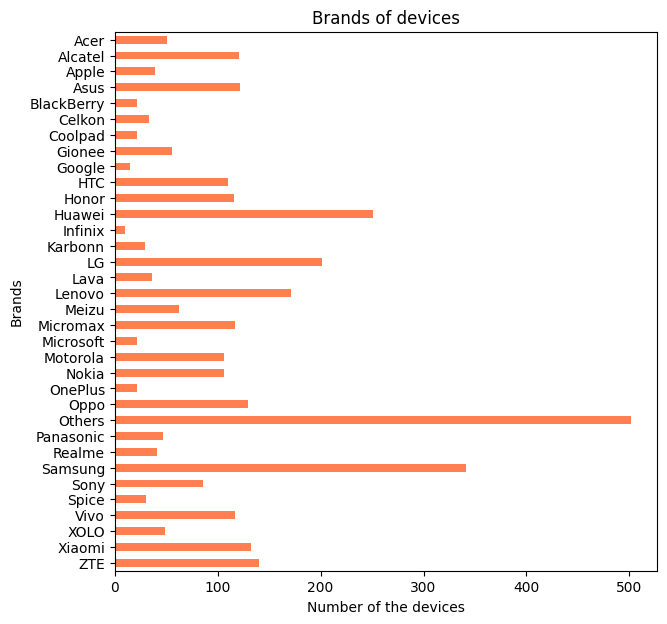

In [18]:
plt.figure(figsize=(7,7))
plt.title('Brands of devices')
used_device_df['device_brand'].value_counts().sort_index(ascending = False).plot(kind = 'barh', color = "coral")
plt.xlabel('Number of the devices')
plt.ylabel('Brands')
plt.show()

For the major part of the devices, the brand is unknown. In the two following positions we find Samsung and Huawei with altogether 592 devices. Probably they are both smartphones and tablets.

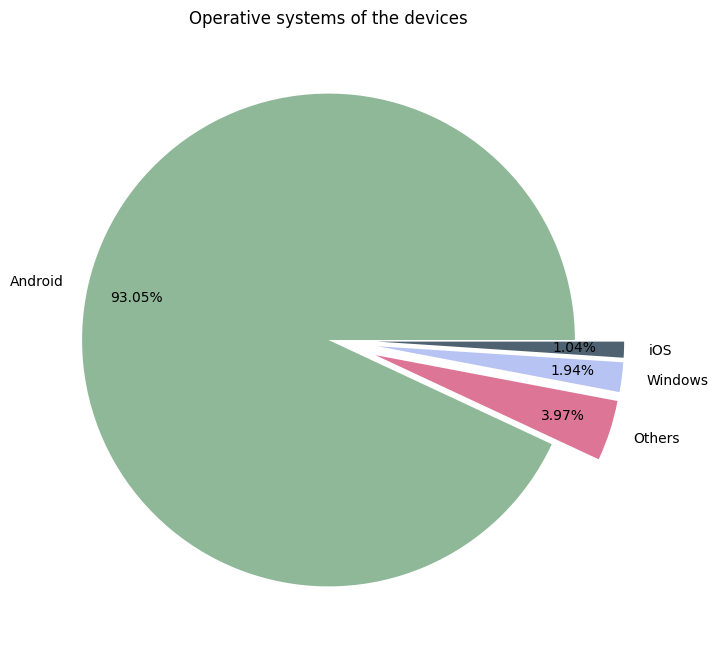

In [19]:
plt.figure(figsize=(8,8))
values = used_device_df['os'].value_counts()
labels = ['Android', 'Others', 'Windows', 'iOS']
colors = ['#8EB897','#DD7596', '#B7C3F3', '#4F6272']
explode = (0, .2, .2, .2)
plt.pie(values, labels = labels, colors = colors, autopct = '%.2f%%', explode = explode, pctdistance= 0.8)
plt.title('Operative systems of the devices')
plt.show()

Almost the entire dataset contains android devices, less than $7\%$ are other operative systems.

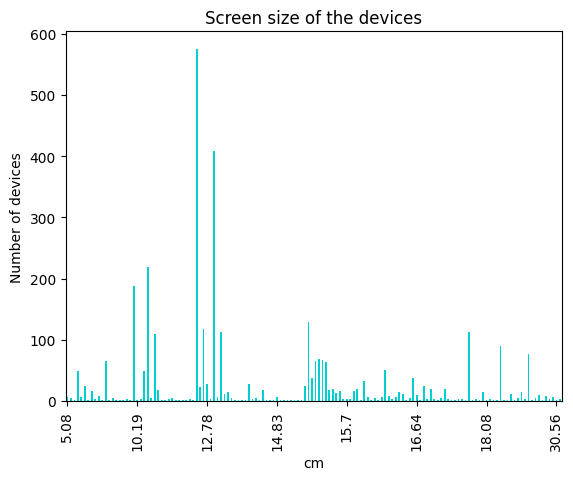

In [20]:
plt.figure()
ax = used_device_df['screen_size'].value_counts().sort_index().plot(kind = 'bar', color = "darkturquoise")   
ax.set_xticks(ax.get_xticks()[::20]) 
plt.title('Screen size of the devices')
plt.xlabel('cm')
plt.ylabel('Number of devices')
plt.show()

The distribuition of the screen size of the sampled devices is not Gaussian. On the right we can almost see a bell-shape distribuition and I suspect that they are most smartphones even if there's no label in the dataframe explaining it, whereas on the left the long tail makes me think that these devices are mostly tablets.

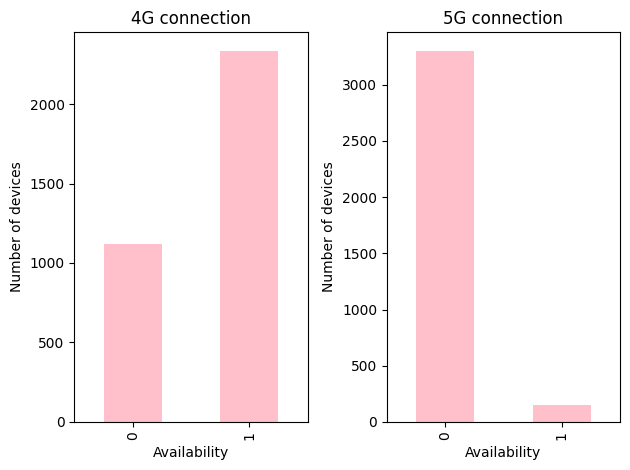

In [50]:

fig, axes = plt.subplots(nrows=1, ncols=2)
plt.setp(axes, xlabel = "Availability", ylabel= "Number of devices")
ax0 = used_device_df['4g'].value_counts().sort_index().plot(kind='bar', color = "pink", ax = axes[0])
ax1 = used_device_df['5g'].value_counts().sort_index().plot(kind='bar', color = "pink", ax = axes[1])
ax0.title.set_text('4G connection')
ax1.title.set_text('5G connection')
fig.tight_layout() 
plt.show()



From this barplot we can see that more than $\frac{2}{3}$ of the devices present the $4G$ technology, whereas the $5G$ technology is present in less than 500 devices as it should be if we consider the fact that it is a recently introducted technology.

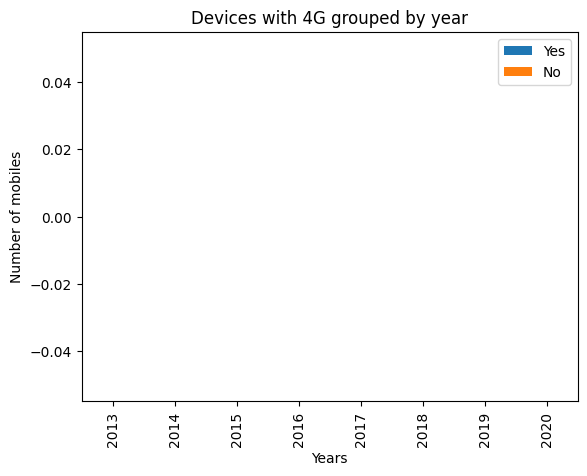

In [51]:
#separing values for year 2013
yes13 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2013)])
no13 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2013)])

#separing values for year 2014
yes14 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2014)])
no14 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2014)])

#separing values for year 2015
yes15 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2015)])
no15 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2015)])

#separing values for year 2016
yes16 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2016)])
no16 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2016)])

#separing values for year 2017
yes17 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2017)])
no17 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2017)])

#separing values for year 2018
yes18 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2018)])
no18 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2018)])

#separing values for year 2019
yes19 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2019)])
no19 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2019)])

#separing values for year 2020
yes20 = len(used_device_df[(used_device_df['4g']=='yes') & (used_device_df['release_year']==2020)])
no20 = len(used_device_df[(used_device_df['4g']=='no') & (used_device_df['release_year']==2020)])


#creating a groupby dataframe
years_df = pd.DataFrame({
    'Years': ['2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
    'Yes': [yes13, yes14, yes15, yes16, yes17, yes18, yes19, yes20],
    'No': [no13, no14, no15, no16, no17, no18, no19, no20]
})
  
years_df.plot(x="Years", y=["Yes", "No"], kind="bar")
plt.ylabel('Number of mobiles')
plt.title('Devices with 4G grouped by year')
plt.show()

As I expected, the number of released devices with $4G$ is every year smaller. These devices may probably be the already presented "dumb-phones" and some tablets, but as I already told without the name of the specific model it is difficult to determine.

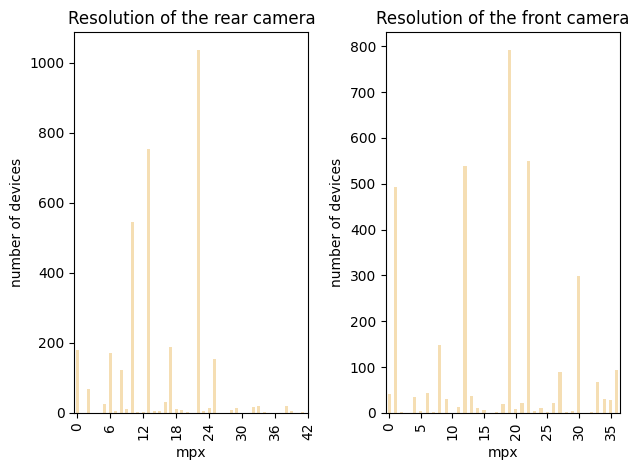

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2)
plt.setp(axes, xlabel = "mpx", ylabel= "number of devices")
ax0 = used_device_df['rear_camera_mp'].value_counts().sort_index().plot(kind = 'bar', color = "wheat", ax = axes[0], xticks = np.linspace(0, 42, 8))
ax1 = used_device_df['front_camera_mp'].value_counts().sort_index().plot(kind = 'bar', color = "wheat", ax = axes[1], xticks = np.linspace(0, 35, 8))
ax0.title.set_text('Resolution of the rear camera')
ax1.title.set_text('Resolution of the front camera')
fig.tight_layout() 
plt.show()

From the plots it is more clear than from the statistics than:
- the range of the resolution of the cameras is bigger for the rear camera than the front one;
- a lot of devices are released without the camera.

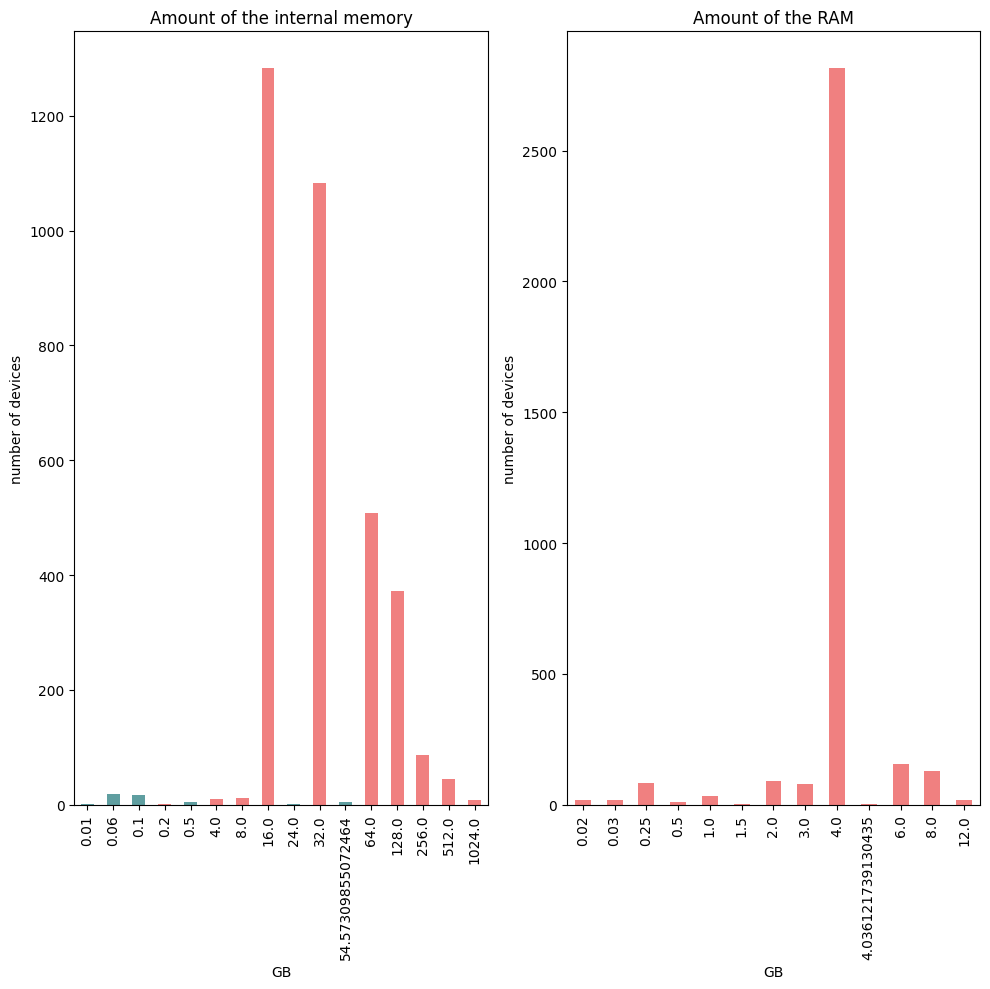

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
plt.setp(axes, xlabel = "GB", ylabel= "number of devices")
my_colors = ['cadetblue','cadetblue','cadetblue','lightcoral','cadetblue','lightcoral','lightcoral','lightcoral','cadetblue','lightcoral','cadetblue','lightcoral','lightcoral','lightcoral','lightcoral','lightcoral']
ax0 = used_device_df['internal_memory'].value_counts().sort_index().plot(kind = 'bar', ax = axes[0], color = my_colors)
ax1 = used_device_df['ram'].value_counts().sort_index().plot(kind = 'bar', ax = axes[1], color = 'lightcoral')
ax0.title.set_text('Amount of the internal memory')
ax1.title.set_text('Amount of the RAM')
fig.tight_layout() 
plt.show()

I decided to highlight on the graph regarding the internal memory because of the previous analysis, and this seems also a good choice if we consider the fact that by looking at the plot, most of the devices has a internal memory with a power of 2.

About the amount of RAM we can see that the major part of the devices released between 2013 and 2014 sas a $4GB$ memory

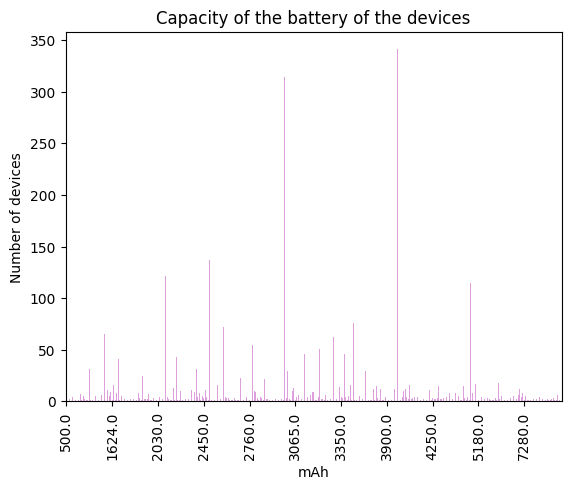

In [53]:
plt.figure()
ax = used_device_df['battery'].value_counts().sort_index().plot(kind = 'bar', color = "plum")   
ax.set_xticks(ax.get_xticks()[::30]) 
plt.title('Capacity of the battery of the devices')
plt.xlabel('mAh')
plt.ylabel('Number of devices')
plt.show()

The plot shows no particular distribuition of the data.

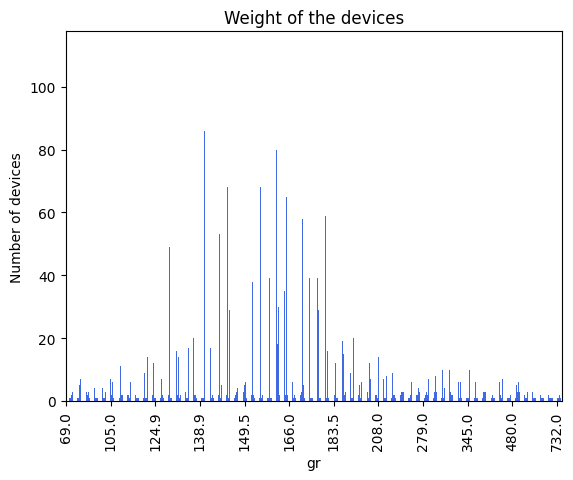

In [26]:
plt.figure()
ax = used_device_df['weight'].value_counts().sort_index().plot(kind = 'bar', color = "royalblue")   
ax.set_xticks(ax.get_xticks()[::50]) 
plt.title('Weight of the devices')
plt.xlabel('gr')
plt.ylabel('Number of devices')
plt.show()

The only thing we can say about this plot is that the weight of the devices has a Gaussian distribuition.

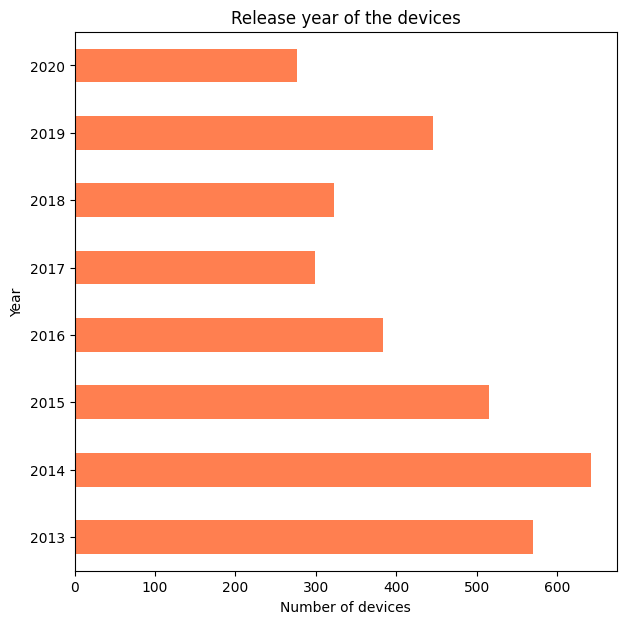

In [27]:
plt.figure(figsize=(7,7))
plt.title('Release year of the devices')
used_device_df['release_year'].value_counts().sort_index().plot(kind='barh', color = "coral")
plt.xlabel('Number of devices')
plt.ylabel('Year')
plt.show()

From this plot it is clear that the year in which less devices have been released is 2020. Probably the fault may be in the pandemic.

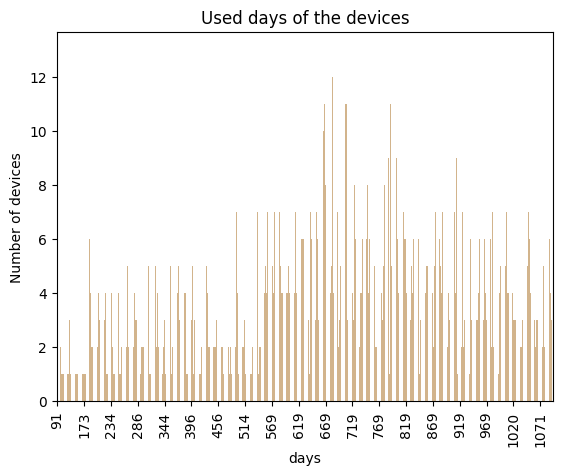

In [28]:
plt.figure()
ax = used_device_df['days_used'].value_counts().sort_index().plot(kind = 'bar', color = "tan")   
ax.set_xticks(ax.get_xticks()[::50]) 
plt.title('Used days of the devices')
plt.xlabel('days')
plt.ylabel('Number of devices')
plt.show()

The plot shows no particular distribuition of the data.

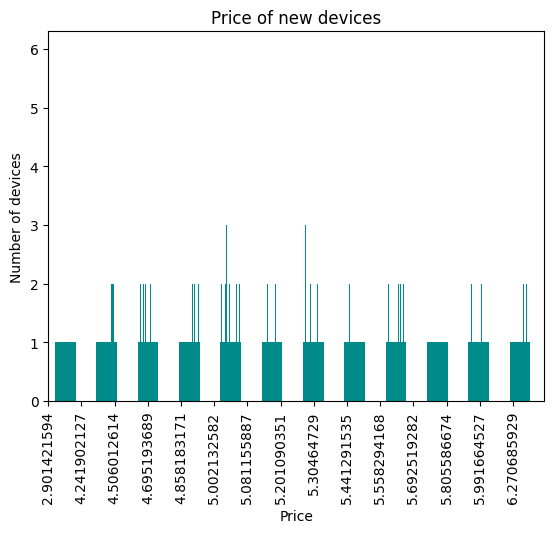

In [29]:
plt.figure()
ax = used_device_df['new_price'].value_counts().sort_index().plot(kind = 'bar', color = "darkcyan")   
ax.set_xticks(ax.get_xticks()[::200]) 
plt.title('Price of new devices')
plt.xlabel('Price')
plt.ylabel('Number of devices')
plt.show()

It's difficult to infer something from this plot, because the price has been normalized and almost every device has a different price. It is also clear from the bell-sistribuition of the data.

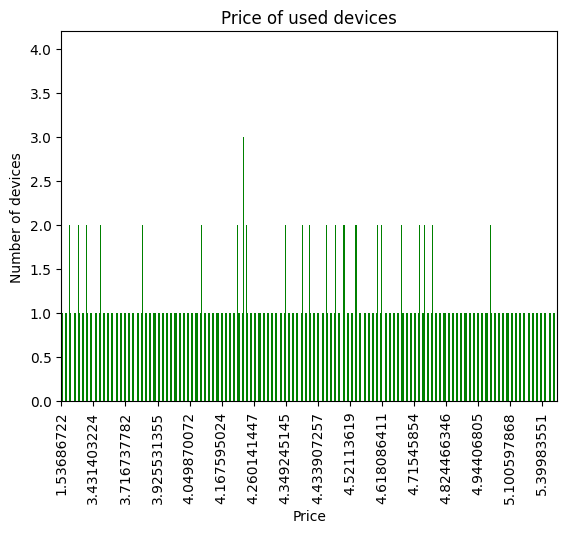

In [30]:
plt.figure()
ax = used_device_df['used_price'].value_counts().sort_index().plot(kind = 'bar',color = "green")   
ax.set_xticks(ax.get_xticks()[::200]) 
plt.title('Price of used devices')
plt.xlabel('Price')
plt.ylabel('Number of devices')
plt.show()

Also here we have a normalization of the prices, so we still can't say much.

A heatmap would be now useful to plot, in order to see more clearly the correlation between variables

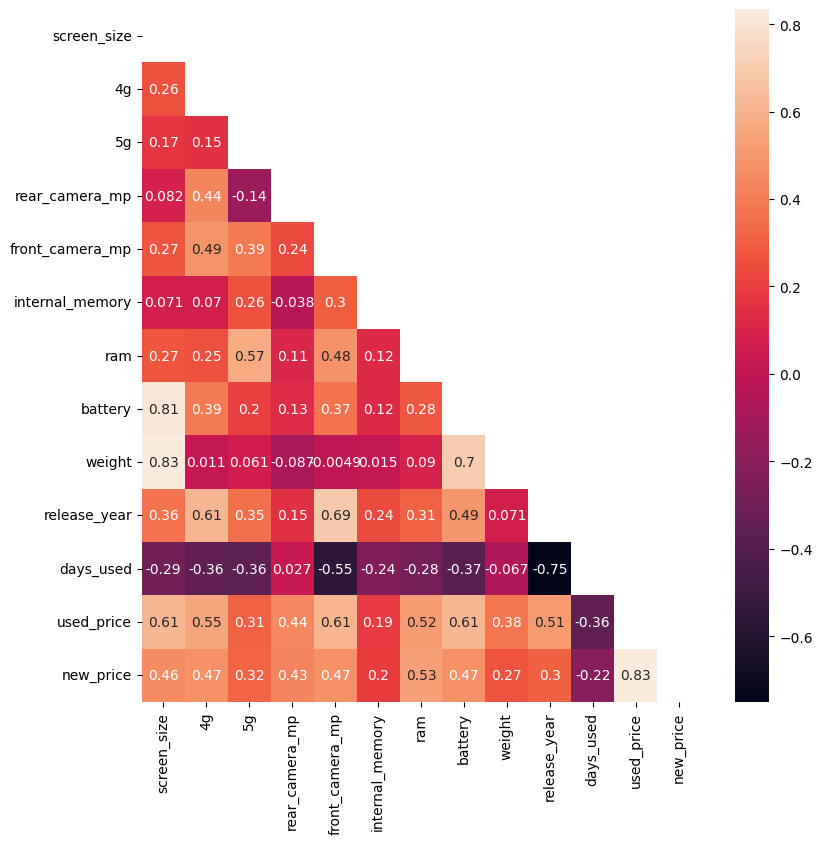

In [55]:
#replacing zeros with ones to have the correlation of these two categorical variables
used_device_df["4g"] = used_device_df["4g"].replace({"yes": 1, "no": 0})
used_device_df["5g"] = used_device_df["5g"].replace({"yes": 1, "no": 0})

#mask to only get the diagonal of the heatmap specifying to exclude categorical variables
diag = np.triu(np.ones_like(used_device_df.corr(numeric_only = True)))

plt.figure(figsize = (9, 9))
sns.heatmap(used_device_df.corr(numeric_only = True), annot = True, mask = diag)
plt.show()

From this correlation matrix it can be seen that:
- the screen size is strongly correlated with the battery and the weight, probably because a big screen needs a bigger battery to last and because of this it weights more;
- the release year is strongly correlated with the days used, probably because in the years we got used to change our devices very quickly because of the constant updates released;
- the normalized price of a used device is very strong correlated with the normalized price of a new model.


Let's see graphically these correlations:

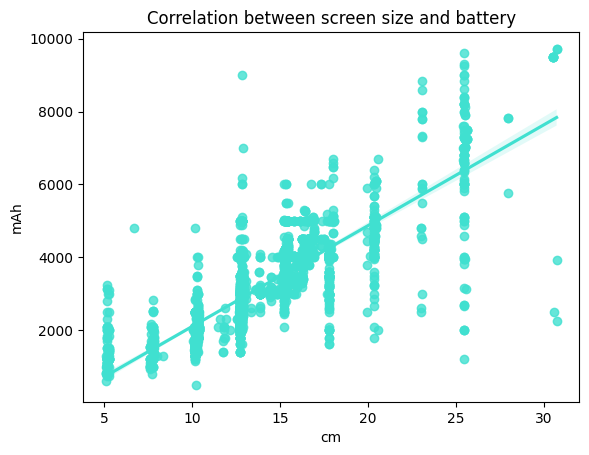

In [56]:
sns.regplot(x = used_device_df['screen_size'],y = used_device_df['battery'],color = 'turquoise' )    
plt.xlabel('cm')
plt.ylabel('mAh')
plt.title('Correlation between screen size and battery')
plt.show()

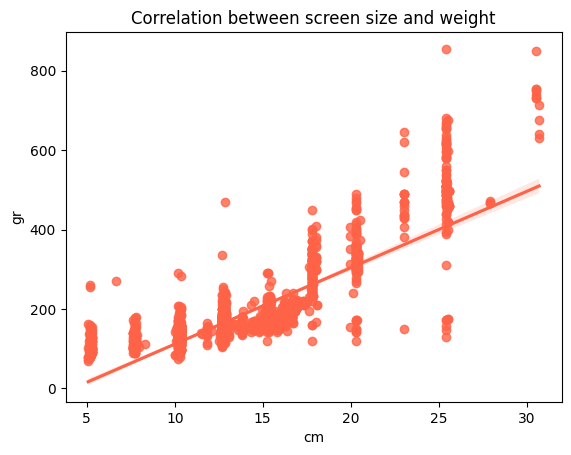

In [57]:
sns.regplot(x = used_device_df['screen_size'],y = used_device_df['weight'], color = 'tomato')    
plt.xlabel('cm')
plt.ylabel('gr')
plt.title('Correlation between screen size and weight')
plt.show()

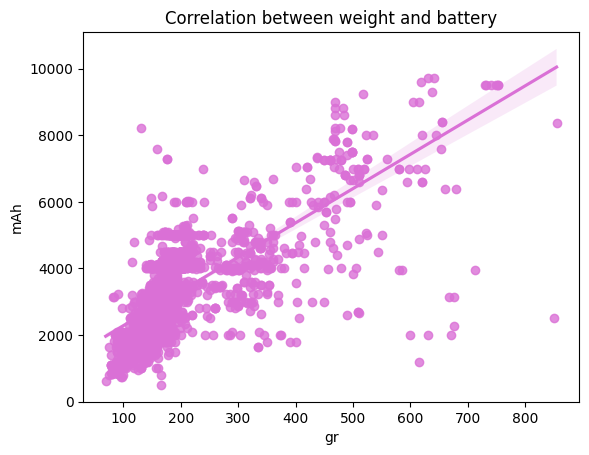

In [34]:
sns.regplot(x = used_device_df['weight'],y = used_device_df['battery'], color = 'orchid')    
plt.xlabel('gr')
plt.ylabel('mAh')
plt.title('Correlation between weight and battery')
plt.show()

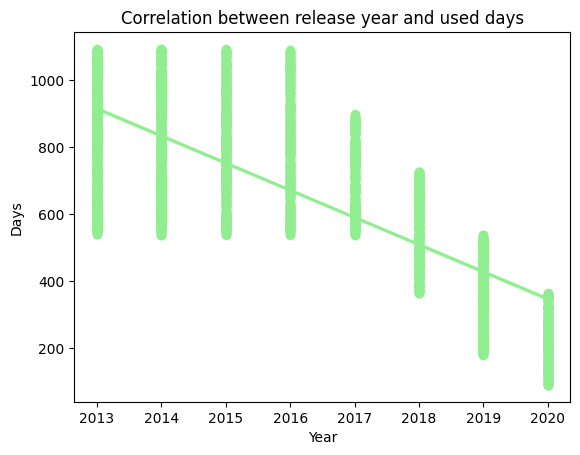

In [35]:
sns.regplot(x = used_device_df['release_year'],y = used_device_df['days_used'], color = 'lightgreen')    
plt.xlabel('Year')
plt.ylabel('Days')
plt.title('Correlation between release year and used days')
plt.show() 

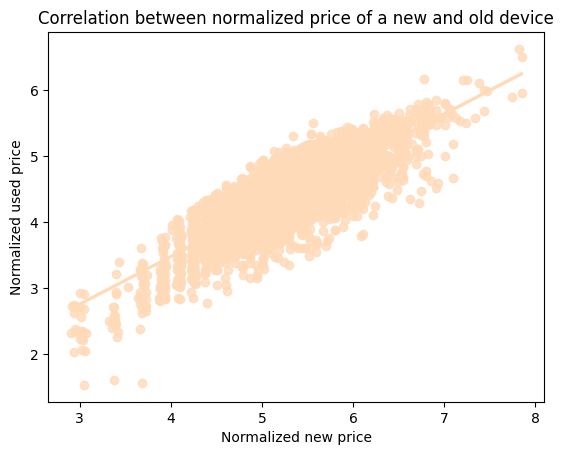

In [58]:
sns.regplot(x = used_device_df['new_price'],y = used_device_df['used_price'], color = 'peachpuff')   
plt.xlabel('Normalized new price')
plt.ylabel('Normalized used price')
plt.title('Correlation between normalized price of a new and old device')
plt.show() 


# Model to explain data

I start importing the libriaries I will use for the analysis

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm

I start by splitting my dataset into a train set and test set randomly:

In [59]:
train_df, test_df = train_test_split(used_device_df, test_size=0.2, random_state = 22) #random state to always retrive the same results

In [39]:
print('The training set has', train_df.shape[0],'samples, while the test set has',test_df.shape[0])

The training set has 2763 samples, while the test set has 691


I prapare the independent variables and the dependent variable both fort the train and the test set considering the used price as the variable I want to predict:

In [40]:
#preparing the training set
y_train = train_df[['used_price']].copy()
x_train = train_df.drop(['used_price', 'device_brand','os'], axis=1)

#preparing the test set
y_test = test_df[['used_price']].copy()
x_test = test_df.drop(['used_price', 'device_brand','os'], axis=1)

In [60]:
Xc = sm.add_constant(x_train) #adding a columns of ones in order to get the intercept
model = sm.OLS(y_train, Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1191.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        19:01:37   Log-Likelihood:                 83.502
No. Observations:                2763   AIC:                            -141.0
Df Residuals:                    2750   BIC:                            -63.99
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -56.7420      8.311     

The $R^2$ (coefficient of determination) is pretty high, which means that the model fits pretty good, but the condition number is high too, and it is caused by a multicollinearity between variables. Multicollinearity is usually high, because some variables are almost linear dependent, so I want to see if I can get better results by reducing the number of the variables to avoid overfitting. To obtain this I use forward subset selection and I take into accont the residual sum of squares of the model on the test set as parameter for the best fit.

I start importing the first libraries:

In [42]:
from itertools import combinations
import scipy.stats as stats
from sklearn.metrics import mean_squared_error

I define a function to do the linear regression and save the values of the residual sum of square on the training set, and one to prepare the RSS on the test set previously trained:

In [61]:
def linear_reg(X,Y): #function to prepare the R_squared and the RSSs
    model_k = LinearRegression(fit_intercept = True).fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    return RSS, model_k


def RSS_test(model, X1, Y1): #function to get predictions on the test set
    yhat = model.predict(X1)
    RSS_tested = ((yhat - Y1) ** 2).sum() 
    RSS_tested = RSS_tested[0]
    return RSS_tested

I implement the forward selection to understand which variables are better to keep:

In [62]:
remaining_variables = list(x_train.columns.values)
variables = []
RSS_list = [np.inf] 
RSStest_list = []
variables_list = dict()

for i in range(1,13):
    best_RSS = np.inf #at the begginning the first RSS is always acceptable
    
    for comb in combinations(remaining_variables,1):

            result = linear_reg(x_train[list(comb) + variables],y_train)
            RSStest = RSS_test(result[1], x_test[list(comb) + variables], y_test)  
            if result[0] < best_RSS: #choosing the smallest RSS
                best_RSS = result[0]
                related_rss = RSStest
                best_feature = comb[0]

    #Updating variables for next loop
    variables.append(best_feature)
    remaining_variables.remove(best_feature)
    
    #Saving values
    RSS_list.append(best_RSS)
    RSStest_list.append(related_rss)
    variables_list[i] = variables.copy() 
    
RSS_list.remove(RSS_list[0])
listt = list(variables_list.values()) 
num_variables = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
forward_selection = pd.DataFrame({'num_variables': num_variables,'Variables': listt,'RSS_training': RSS_list,'RSS_test': RSStest_list})

I insert a command to see the entire cells:

In [45]:
pd.set_option('display.max_colwidth', 1)

I show the dataset:

In [46]:
forward_selection

,num_variables,Variables,RSS_training,RSS_test
0,1,[new_price],284.849505,78.786278
1,2,"[new_price, release_year]",219.742078,57.227029
2,3,"[new_price, release_year, screen_size]",183.846183,47.601418
3,4,"[new_price, release_year, screen_size, rear_camera_mp]",168.668335,46.081350
4,5,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp]",157.377676,42.082725
5,6,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight]",155.650913,42.014532
6,7,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight, ram]",154.057511,41.677587
7,8,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight, ram, 4g]",152.517697,42.125888
8,9,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight, ram, 4g, days_used]",152.353502,42.111954
9,10,"[new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight, ram, 4g, days_used, battery]",152.306234,42.117940


In this dataframe I put in the first column the number of variables for every model, in the second the names of the variables, in the third the RSS computed on the training set and in the fourth the RSS in a model in which I fit the test set.

By looking at the column of the RSS on the test set, until 7 variables the RSS with the test set fitted is getting smaller, but from the $8^{th}$ there is an overfitting, because it starts increasing. So the best choice is to keep the variables new_price, release_year, screen_size, rear_camera_mp, front_camera_mp, weight and ram in order to predict as best as possible the price of a used device. It can be also shown by plotting the RSS of the test set of the related models.

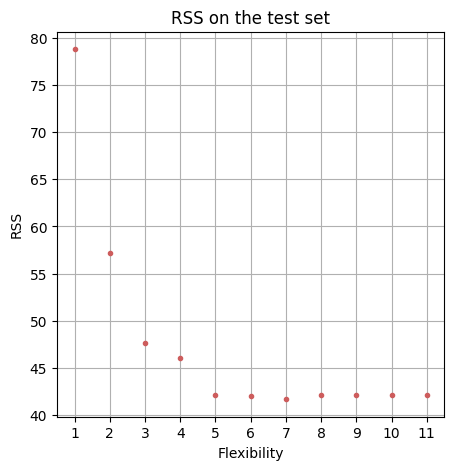

In [47]:

plt.figure(figsize=(5,5))
plt.title('RSS on the test set')

ax=[]
mins=[]
for i in range (1, 12):
    rsss = forward_selection['RSS_test'].loc[forward_selection['num_variables'] == i].copy() #for each number of variables we get the rss
    for m in range (len(rsss)):
        ax.append(i)
    plt.plot(ax, rsss,'.', color = 'indianred', label=i)
    mins.append(rsss.min())
    ax=[]
    
plt.xticks(np.arange(1, 12, 1))
plt.grid(visible=True)
plt.xlabel('Flexibility')
plt.ylabel('RSS')

plt.show()

Also graphically it is visible that we have a minimum with seven variables.

This is a summary of the best model obtained with subset selection:

In [48]:
x_forward = train_df[['new_price','release_year','screen_size','rear_camera_mp','front_camera_mp','weight','ram']].copy() #model obtained with forward selection
Xcc = sm.add_constant(x_forward) 
model = sm.OLS(y_train, Xcc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             used_price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     2017.
Date:                Tue, 13 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:44:01   Log-Likelihood:                 67.513
No. Observations:                2763   AIC:                            -119.0
Df Residuals:                    2755   BIC:                            -71.63
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -63.0970      5.874    -

Although we still have some multicollinearity (always due to the condition number), the column $\mathbb{P}>t$ is a column of zeros, which means that those variables shouldn't be excluded from the model.